# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following link:
- [DDW-MU-Humanities Handout](https://sutdapac-my.sharepoint.com/:w:/g/personal/franklin_anariba_sutd_edu_sg/ESlibHS4e3hDtOyWQ8noqdsBrC8UXO3wwMmTszX6vFIVVg?e=rjIslZ)
- [DDW-MU-SocialStudies Handout](https://sutdapac-my.sharepoint.com/:w:/g/personal/franklin_anariba_sutd_edu_sg/EQ8CAm4PPupOlXqv9zTNkQYBpD_yGdwMWytBYpJTi9dzew?e=beEbac)


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project.

## Students Submission

Student's Name:
- Dheena Leonara, 1006060
- John-David Tan Ming Sheng, 1005971
- Mehta Yash Piyush, 1006516
- Rishita Langrakade, 1006031

### Overview About the Problem

Before talking about the problem, let's break down "food security" and explore this concept. Food security is a critical issue and refers to the availability and affordability of food in a country to its residents. It is the UN's 19th Sustainable Development Goal but has not shown sufficient progress and is projected to miss UN's Zero Hunger by 2030 Goal. This issue has only been exacerbated by the socio-economic impacts of the Covid-19 Pandemic and more importantly, the ongoing war between Russia and Ukraine. 

Russia and Ukraine, both nearly account for one-third of the global wheat supply. Specifically, Ukraine is consistently one of the largest producers of each agricultural product, with their productions of wheat, barley and corn, making up 10% , 13% and 15% respectively of the global supply. Agriculture also constitutes 12.2% of their annual GDP and 41% of all exports. 

In Feb 2022, Russia invaded Ukraine which had a major impact on the agricultural industry. Most of the countries reliant on Ukraine are third-world countries. One such country, Tunisia, imports approximately 50% of both wheat and corn from Ukraine. And in 2020 alone, Tunisia imported USD 437 million worth of wheat. Moreover, Tunisia is an extremely poor country with the farmers least capable of obtaining funds and lack of farms for crop productions, posing them serious food security issues.

This lack of supply of agricultural resources and food would result in an increase in food inflation.

As a result, we formulated our problem statement like, "How might we determine the effect of warfare on food inflation in third-world countries like Tunisia and thus predict it by using multiple linear regression models?"

This long drawn out war has provided sufficient data for us to analyze the effects of warfare on food prices in third-world countries. 

### Dataset

Since Tunisia is a relatively unpopular country, we had to rely on various sources to fetch our data from.

- We obtained the data for Ukraine Exports from 2019 to 2022 through its official database archive page [here](https://ukrstat.gov.ua/operativ/operativ2008/zd/o_eit/arh_o_eit_e.htm) (4 Excel files): 

- Secondly, we obtained Tunisia's GDP from Agriculture through the Trading Economics website [here](https://tradingeconomics.com/tunisia/gdp-from-agriculture) (1 Excel files): 

- Thirdly, we obtained the total population of Tunisia once again through the Trading Economics website [here](https://tradingeconomics.com/tunisia/population?embed/forecast) (1 Excel files):  (1 Excel files): 

- Lastly, we once again acquired the crude oil prices through the Trading Economics website [here](https://tradingeconomics.com/commodity/crude-oil) (1 Excel files): 

As such, the data pre-processing and combination of data was essential. This entire process was manipulated and combined on Python itself. (NOTE: Some cells below have been hidden by the 'o' letter for the sake of brevity. You may click on 'o' again to see the output.)

More about the dataset will be discussed after this data pre-processing.

#### Data Pre-Processing

In [1]:
#Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

In [2]:
#Data pre-processing for Ukraine Exports for the year 2022

df_2022 = pd.read_excel("Ukraine_Exports_2022.xlsx") #Reads excel file
df_2022

,Date,Export
0,Jan-22,6008.6
1,Feb-22,5297.8
2,Mar-22,2646.3
3,Apr-22,2644.2
4,May-22,2910.0
5,Jun-22,3159.3
6,Jul-22,2917.7


In [3]:
#Data pre-processing for Ukraine Exports for the year 2021

df_2021 = pd.read_excel("Ukraine_Exports_2021.xlsx", skiprows=3) #Reading excel file and skipping first 3 rows because of format of orignal excel file
df_2021 = df_2021.iloc[0,:] #Retrieving the first row of the dataset which corresponds to our exports
df_2021.drop(index=df_2021.index[-1],axis=0,inplace=True) #Dropping the last row of dataset
df_2021.drop(index=df_2021.index[0],axis=0,inplace=True) #Dropping the first row of dataset
df_2021 = df_2021.to_frame() #Converting to dataframe
df_2021 = df_2021.rename(columns = {0:'Export'}) #Changing the header row name
df_2021['Date'] = df_2021.index + 1 #Creating rows of numbers starting from 1 to length of dataframe
df_2021.insert(0, 'Date', df_2021.pop('Date')) #Shifting position of Column Date
df_2021['Date'] = df_2021['Date'].apply(lambda x: calendar.month_abbr[x] + "-21") #Convering numbers into Months and adding year
df_2021

,Date,Export
0,Jan-21,3927.5
1,Feb-21,4515.0
2,Mar-21,5256.0
3,Apr-21,5361.4
4,May-21,5545.1
5,Jun-21,5305.8
6,Jul-21,5603.2
7,Aug-21,6297.9
8,Sep-21,6394.5
9,Oct-21,6264.1


In [4]:
#Data pre-processing for Ukraine Exports for the year 2020

df_2020 = pd.read_excel("Ukraine_Exports_2020.xlsx", skiprows=3) #Reading excel file and skipping first 3 rows because of format of orignal excel file
df_2020 = df_2020.iloc[0,:] #Retrieving the first row of the dataset which corresponds to our exports
df_2020.drop(index=df_2020.index[-1],axis=0,inplace=True) #Dropping the last row of dataset
df_2020.drop(index=df_2020.index[0],axis=0,inplace=True) #Dropping the first row of dataset
df_2020 = df_2020.to_frame() #Converting to dataframe
df_2020 = df_2020.rename(columns = {0:'Export'}) #Changing the header row name
df_2020['Date'] = df_2020.index + 1 #Creating rows of numbers starting from 1 to length of dataframe
df_2020.insert(0, 'Date', df_2020.pop('Date')) #Shifting position of Column Date
df_2020['Date'] = df_2020['Date'].apply(lambda x: calendar.month_abbr[x] + "-20") #Convering numbers into Months and adding year
df_2020

,Date,Export
0,Jan-20,4155.01444
1,Feb-20,3945.27627
2,Mar-20,4135.7
3,Apr-20,3838.96119
4,May-20,3438.12314
5,Jun-20,3381.11149
6,Jul-20,3720.20576
7,Aug-20,4213.43111
8,Sep-20,4175.19511
9,Oct-20,4610.58228


In [5]:
#Data pre-processing for Ukraine Exports for the year 2019

df_2019 = pd.read_excel("Ukraine_Exports_2019.xlsx", skiprows=4) #Reading excel file and skipping first 3 rows because of format of orignal excel file
df_2019 = df_2019.iloc[0,:] #Retrieving the first row of the dataset which corresponds to our exports
df_2019 = df_2019.to_frame() #Converting to dataframe
df_2019 = df_2019.iloc[1: , :] #Removing first row
df_2019 = df_2019.rename(columns = {0:'Export'}) #Changing the header row name
df_2019.drop(df_2019.tail(2).index,inplace=True) #Dropping the last two row items
df_2019['Date'] = df_2019.index + 1 #Creating rows of numbers starting from 1 to length of dataframe
df_2019.insert(0, 'Date', df_2019.pop('Date')) #Shifting position of Column Date
df_2019['Date'] = df_2019['Date'].apply(lambda x: calendar.month_abbr[x] + "-19") #Convering numbers into Months and adding year
df_2019

,Date,Export
0,Jan-19,4060
1,Feb-19,3888.6
2,Mar-19,4321.3
3,Apr-19,4089.5
4,May-19,4534.7
5,Jun-19,3573.3
6,Jul-19,4276.4
7,Aug-19,4282.3
8,Sep-19,4062.2
9,Oct-19,4549.1


In [6]:
#Combining all the three previous datasets to get final Ukraine exports for 2019, 2020 and 2021

pdlist = [df_2019,df_2020,df_2021,df_2022]

df_exports = pd.concat(pdlist, ignore_index = True, axis = 0) #Concatenating all the 4 dataframes we have obtained
df_exports = df_exports.iloc[6:] #Selecting data from 2019 onwards as we are analyzing that particular timeframe
df_exports.reset_index(drop = True, inplace = True) #Resetting the index

df_exports["Export"] = pd.to_numeric(df_exports["Export"])

df_exports

,Date,Export
0,Jul-19,4276.40000
1,Aug-19,4282.30000
2,Sep-19,4062.20000
3,Oct-19,4549.10000
4,Nov-19,4320.00000
5,Dec-19,4097.20000
6,Jan-20,4155.01444
7,Feb-20,3945.27627
8,Mar-20,4135.70000
9,Apr-20,3838.96119


In [7]:
#Data pre-processing for Tunisia Agricultural GDP Exports

df_agri = pd.read_excel("Agriculture_GDP.xlsx") #Reading the Tunisia Agricultural GDP Export file
df_agri["USD(million)"] = df_agri["TND(million)"] * 0.32 #Creating a new row and changing TND to USD
df_agri.drop('TND(million)', axis=1, inplace=True) #Dropping the TND(Million) column in-place
df_agri


,Time,USD(million)
0,Jul-19,242.986667
1,Aug-19,245.738667
2,Sep-19,245.738667
3,Oct-19,245.738667
4,Nov-19,242.357333
5,Dec-19,242.357333
6,Jan-20,242.357333
7,Feb-20,244.693333
8,Mar-20,244.693333
9,Apr-20,244.693333


In [8]:
#Data pre-processing for Tunisia Population

df_population = pd.read_excel("Tunisia_Population.xlsx") #Reading the Tunisia Population Export Excel file
df_population = df_population.iloc[6:] #Selecting data from 2019 onwards as we are analyzing that particular timeframe
df_population.reset_index(drop = True, inplace = True) #Resetting the index

df_population

,Time,Population (millions)
0,Jul-19,11.635000
1,Aug-19,11.649167
2,Sep-19,11.663333
3,Oct-19,11.677500
4,Nov-19,11.691667
5,Dec-19,11.705833
6,Jan-20,11.720000
7,Feb-20,11.727500
8,Mar-20,11.735000
9,Apr-20,11.742500


In [9]:
#Data pre-processing for Crude Oil Prices

df_oil = pd.read_excel("Oil_Prices.xlsx") #Reading the Crude Oil Prices Excel file
df_oil

,Time,USD/Barrel
0,Jul-19,58.580
1,Aug-19,55.100
2,Sep-19,54.070
3,Oct-19,54.180
4,Nov-19,55.487
5,Dec-19,60.756
6,Jan-20,51.560
7,Feb-20,44.760
8,Mar-20,20.480
9,Apr-20,18.840


In [10]:
#Data pre-processing for Food Inflation

df_inflation = pd.read_excel("Food_Inflation.xlsx") #Reading the Food Inflation Excel file
df_inflation.rename(columns = {'Change in Food Prices Relative':'Food Inflation'}, inplace = True) #Changing the header row name
df_inflation

,Time,Food Inflation
0,Jul-19,100.000000
1,Aug-19,107.400000
2,Sep-19,115.240200
3,Oct-19,122.846053
4,Nov-19,130.585355
5,Dec-19,138.159305
6,Jan-20,144.238315
7,Feb-20,149.575132
8,Mar-20,157.203464
9,Apr-20,166.950079


In [11]:
#Combining 3 features, Ukraine Exports, Tunisia Population and Fuel Prices and Food Inflation (Response variable)

finallist = [df_exports,df_population.iloc[:, -1:],df_oil.iloc[:, -1:],df_inflation.iloc[:, -1:]] #Not including date column in the other features

df_final = pd.concat(finallist, axis = 1) #Concatenating everything

df = df_final.rename(columns = {'Date' : 'Time', 'Export' : 'Ukraine Exports ($M)',
    'Population (millions)': 'Tunisia Population (M)', 'USD/Barrel': 'Fuel Prices ($/BBL)', 'Food Inflation' : 'Food Inflation (Response)'}) #Renaming the column names

df

,Time,Ukraine Exports ($M),Tunisia Population (M),Fuel Prices ($/BBL),Food Inflation (Response)
0,Jul-19,4276.40000,11.635000,58.580,100.000000
1,Aug-19,4282.30000,11.649167,55.100,107.400000
2,Sep-19,4062.20000,11.663333,54.070,115.240200
3,Oct-19,4549.10000,11.677500,54.180,122.846053
4,Nov-19,4320.00000,11.691667,55.487,130.585355
5,Dec-19,4097.20000,11.705833,60.756,138.159305
6,Jan-20,4155.01444,11.720000,51.560,144.238315
7,Feb-20,3945.27627,11.727500,44.760,149.575132
8,Mar-20,4135.70000,11.735000,20.480,157.203464
9,Apr-20,3838.96119,11.742500,18.840,166.950079


#### Dataset Exploration

This dataset here is a 3 year time series data that spans from July 2019 to July 2022. The corresponding variables are numerical and doesn't consist of any categorical data.

Because this is a one-off event (Covid-19 + Russia vs Ukraine), we voluntarily chose a smaller dataset as we wanted to focus more on the accuracy of our model and the appropriate selection of variables, without any overfitting. While we could collectively explore the top 10 countries whose food supply was disrupted by this war, the characteristics would vividly vary among those third-world countries.

After brainstoriming and exploring the domain knowledge of our list of features, we finally settled on the following variables:

Ukraine Exports ($M) - This consists of the monthly volumes of foreign trades in goods by Ukraine to the rest of the world.

Tunisia's Agricultural GDP ($M) - This consists of the monthly Agricultural GDP that Tunisia currently earns.

Tunisia's Population (M) - A higher population would mean a higher demand for food and would translate to a higher inflation rate.

Crude Oil Prices ($/BBL) - Crude oil is a key driver of food inflation. From the production of fertilizers to the usage of oil for powering ships, it is hypothesized that an increase in crude oil prices would result in a higher price for food.

Now let's take a brief exploratory look at our data.

In [64]:
df.columns #These are simply the column names we mentioned above

Index(['Time', 'Ukraine Exports ($M)', 'Tunisia Population (M)',
       'Fuel Prices ($/BBL)', 'Food Inflation (Response)'],
      dtype='object')

In [65]:
df.shape #This indicates the data contains 37 rows and 6 columns

(37, 5)

In [66]:
df.describe() #The 5-point summary of statistical functions are displayed

,Ukraine Exports ($M),Tunisia Population (M),Fuel Prices ($/BBL),Food Inflation (Response)
count,37.000000,37.000000,37.000000,37.000000
mean,4552.301862,11.825689,62.469270,327.293844
std,1136.393614,0.112215,23.021347,215.587968
min,2644.200000,11.635000,18.840000,100.000000
25%,3927.500000,11.742500,45.340000,166.950079
50%,4282.300000,11.810000,59.160000,250.218312
75%,5305.800000,11.907500,74.880000,432.926171
max,6808.500000,12.048000,111.910000,906.707932


We notice huge disparity in the ranges of data. For example, some values are in the thousands (Ukraine Exports's max value), while there are some values that are in the mere tens place. This hints that we would most definitely have to carry a standardization such that there are no dominance of certain predictors. 

We also obtain other information about the data at a glance. For example, we see that the volatility (std. dev) of the fuel prices is high, reflecting the macroeconomic conditions (same is true for Ukraine Exports).

To get a better visual understanding, we could also utilize the pairplot function from the seaborn library.

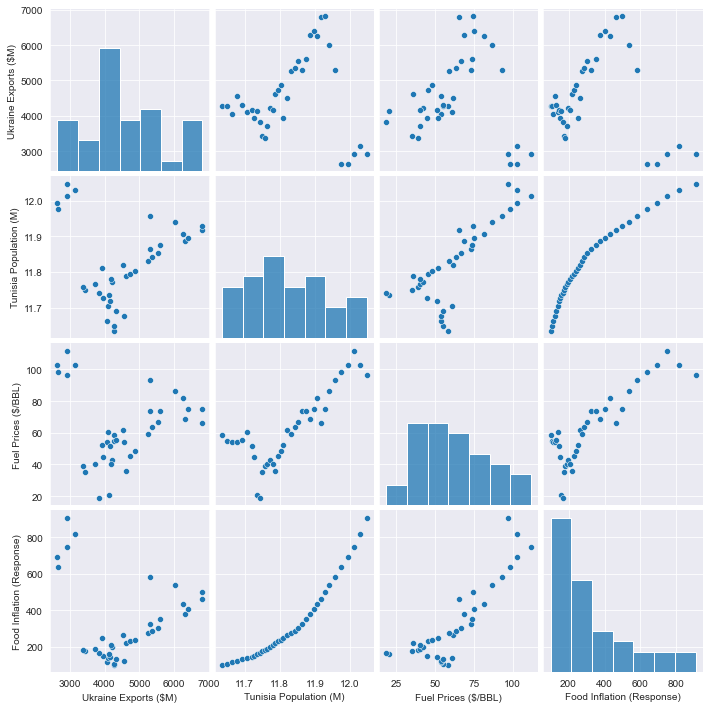

In [67]:
sns.set_style('darkgrid')
sns.pairplot(df)

Visually, we can roughly get an idea of 3 diagrams and the type of plot they might satisfy. These are:

- Tunisia Population (M) vs Food Inflation (Response) which looks like it would be best suited by a polynomial regression. This also suggests that this might be a good predictor variable for our response variable as it seems to have a high R-squared value.

- Fuel Prices ($/BBL) vs Food Inflation (Response) which follows a linear regression if the outliers would be removed.

- Food inflation (Response) vs Tunisia Population (M) which looks like it would be best suited by a polynomial regression, like point number 1.

We could take another perspective and plot a regplot and kde plot.

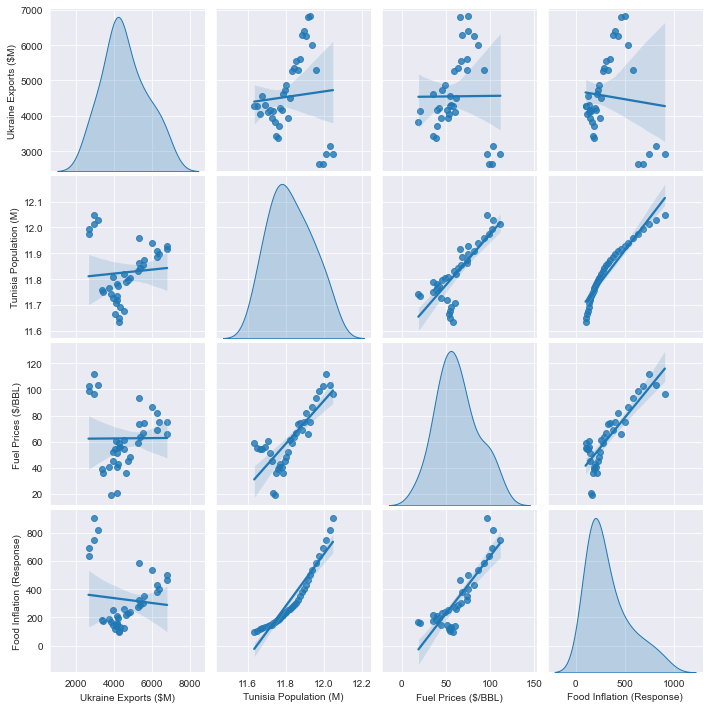

In [16]:
sns.pairplot(df, diag_kind = "kde", kind = 'reg')

We can obtain quite a number of useful insights from this.

Firstly, we can notice most of the plots on the top row belonging to Ukraine Exports ($M) do not conform to a multiple linear regression, due to the R^2 and plotting of the regression line. The nature of supply and demand is inelastic and I believe this would be better suited for other kinds of plots.

Secondly, as discussed earlier, we can see many good fits of the variable Tunisia Population, which would be the result one would expect. We also see this relationship in fuel prices, hinting those two variables seem to be the drivers for the accuracy of our proposed model.

### Features and Target Preparation

Our features, which are the predictor variables as described earlier, are mainly:

Ukraine Exports ($M) - Ukraine's Exports are the supply to Tunisia's food demand. Thus, this law of supply and demand has an obviously direct effect on Tunisia's food inflation rate. Thus, it's our hypothesis that the reduction in Ukraine's Exports will bring about a higher food inflation rate.

Tunisia's Agricultural GDP ($M) - A higher GDP, synonymous with a prosperous agricultural sector, would increase the supply of food and result in a lower food inflation rate.

Tunisia's Population (M) - A higher population would mean a higher demand for food and would translate to a higher inflation rate.

Crude Oil Prices ($/BBL) - From the production of fertilizers to the usage of oil for powering ships, it is hypothesized that an increase in crude oil prices would result in a higher price for food.

Our target or response variable is Food Inflation which could be defined as the individuals economic ability to afford and possess food.

It is to be noted that our dataset doesn't have any additional cleaning to do besides the pre-processing. There are no categorical variables and thus there is no need to create dummy variables and feed it into our model accordingly. Now we shall create our entire list of helper functions.

#### Helper functions 

1. normalize_minmax(dfin) - This function will accept a Data-Frame as input, carry out min-max normalization and return a copy of the new data frame. 

We will use the following formula:

$$normalized = \frac{data - min}{max - min}$$


2. get_features_targets(df, feature_names, target_names): This function will help us obtain the columns for features and  targets from the data frame that we input as argument. The function takes in Pandas' dataframe and two lists. The first list is for the feature names and the other list is for the target names. This function returns a tuple


3. prepare_feature(df_feature): This function will require a data frame as input for the feature. It converts the data frame to a numpy array and changes it into a column vector. The function adds a column of constant 1s in the first column.


4. prepare_target(df_target): This function will require a data frame as input for the target. Takes in a data frame for the target and then converts the data frame to a numpy array and changes it into column vectors.


5. y_hat(X, beta) - This function calculates the y_hat vector, which is the $\hat{y} = Xb$ vector


6. predict(df_feature, beta): This standardizes the feature using z normalization, changes it to a Numpy array, and adds a column of constant 1s. prepare_feature() is used for this purpose. This function will call y_hat()

7. split_data(df_feature, df_target, random_state=None, test_size=0.5): This function will split the DataFrame randomly for feature and target dataframe


8. r2_score(y, ypred): This function calculates the r^2 score otherwise known as coefficient of determination. The formulas is below:

$$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where:

$$SS_{res} = \Sigma_{i=1}^n (y_i - \hat{y}_i)^2$$ 

$$SS_{tot} = \Sigma_{i=1}^n (y_i - \overline{y})^2$$


9. Mean_squared_error(target,pred): This function takes in a target value and predicted value. It uses the following formula:

$$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$


In [17]:
def normalize_minmax(dfin):
    #df=dfin.copy() #Create a deep-copy of the input DataFrame
    dfout=(dfin-dfin.min(axis=0))/(dfin.max(axis=0)-dfin.min(axis=0)) #Implementing formula of min-max normalization.
    #df.max(axis = 0) returns maximum along index axis
    #df.in(axis = 0) returns minimum along index axis
    return dfout

def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names] #This will read the feature_names and assign it to DataFrame df_feature
    df_target = df[target_names] #This will read the feature_names and assign it to DataFrame df_target
    return df_feature, df_target #Return tuple


def prepare_feature(df_feature):
    '''
    Input is [[x1], [x2], [x3], ...]
    Output is [[1, x1],[1, x2], [1,x3]...]
    
    '''
    cols = len(df_feature.columns) #This calculates the length of all columns of df_feature
    feature = df_feature.to_numpy().reshape(-1, cols) #df_feature is converted from Pandas data frame to Numpy array. Then, it creates 'cols' many new column dimension
    X = np.concatenate((np.ones((feature.shape[0],1)), feature), axis=1) # 1 is filled in number of rows of feature and then concatenated with feature
    return X

def prepare_target(df_target): #Creates column vector essentially
    return df_target.to_numpy().reshape(-1, len(df_target.columns)) #df_feature is converted from Pandas data frame to Numpy array. Then, it creates 'cols' many new column dimension

def y_hat(X, beta): 
    '''
    X = [[1, x1],[1, x2], [1,x3]...] # m by #features+1 matrix 
    Beta = [[b0], [b1]] # column vector 
    '''
    return np.matmul(X, beta)

def predict(df_feature, beta): #Predict calculates the straight line equation given the features and its coefficient.
    feature = prepare_feature(normalize_minmax(df_feature)) #This function normalizes df_feature and then inputs it as argument to prepare_feature
    return y_hat(feature, beta) #This function returns calc_linear

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index # Getting index of dataset
    if random_state != None: #If seed is stated
        np.random.seed(random_state) #Initialize the seed
        
    k = int(test_size * len(indexes)) # number of test dataset which is fraction of data set * length of range of dataset
    
    # get the test indexes
    test_index = set(np.random.choice(indexes, k, replace=False)) # set make sure no repeated values. np.random.choice randomly generates and return ndarray of random sample
    train_index = set(indexes) - set(test_index) #Training indices = All indices - test indices


    df_feature_train = df_feature.loc[train_index, :] #Training dataset for features dataframe
    df_feature_test = df_feature.loc[test_index, :] #Testing dataset for features dataframe
    
    df_target_train = df_target.loc[train_index, :] #Training dataset for features dataframe
    df_target_test = df_target.loc[test_index,:] #Testing dataset for features dataframe

    return df_feature_train, df_feature_test, df_target_train, df_target_test

def r2_score(y, ypred):
    ymean = np.mean(y) # mean from actual target
    mean_diff = y - ymean #Difference between y and ymean
    error = y - ypred #Difference between y and y predictor
    
    # numerator
    ss_res = np.matmul(error.T, error) # sum square of error 
    
    # denominator
    ss_tot = np.sum(np.matmul(mean_diff.T, mean_diff)) #sum square of mean_diff
    
    r_2 = 1 - (ss_res/ss_tot) # [[r_2]]
    
    return r_2[0][0]

def mean_squared_error(target, ypred):
    
#METHOD 1: LOOPS
#     summation = 0
#     n = len(target)
    
#     for i in range (0, n):
#         difference = (target[i] - pred[i]) **2
#         summation += difference
        
#     return summation / n
    
#METHOD 2
    n = target.shape[0] #rows of sample data
    return (1/n)*np.sum((target-ypred)**2) #Applying MSE formula
    
#METHOD 3 
#     error = ypred - target #Different between target value and prediction 
#     error_sum_sq = np.matmul(error.T, error) 
    
#     mse = (1/target.shape[0]) * error_sum_sq #MSE formula 
#     return mse[0][0]

### Building Model

Describe your model. Is this Linear Regression or Logistic Regression? Put any other details about the model. Put the codes to build your model.

1. compute_cost():

- The function should take in two 2-D numpy arrays. The first one is the matrix of the linear equation and the second one is the actual target value. The function should receive a numpy array, so we will need to convert to numpy array and change the shape.

By using the following formula - 

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

2. gradient_Descent():
    
It takes in following parameters:

- X: is a 2-D numpy array for the features
- y: is a vector array for the target
- beta: is a column vector for the initial guess of the parameters
- alpha: is the learning rate
- num_iters: is the number of iteration to perform

The function should return two numpy arrays:

- beta: is coefficient at the end of the iteration
- J_storage: is the array that stores the cost value at each iteration





In [18]:
features_list = ['Ukraine Exports ($M)', 'Tunisia Population (M)', 'Fuel Prices ($/BBL)']
target_list = ['Food Inflation (Response)']

df_features, df_target = get_features_targets(df, features_list, target_list)
df_features = normalize_minmax(df_features) 

In [19]:
#Building the compute cost function

def compute_cost(X, y, beta):
    '''
    X: 2D array, [[1, x1],[1, x2], [1,x3]...]
    Y: Vector (2D array), [[y0],[y1],[y2]]
    '''
    J = 0 
    m = X.shape[0] # First dimension of X
    predicted_target = y_hat(X, beta) # y-hat vector 
    error_value = predicted_target - y # this is a vector (y-hat - y)

    error_value_sq = np.matmul(error_value.T, error_value) # Calculating sum over squares (y-hat - y)-transposed MUL (y-hat - y)
    J = 1/(2*m) * error_value_sq #Equation of compute_cost()
    return J[0][0] # return value should be a float 

In [20]:
#Building out Gradient Descent Model

def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0] # number of datapoints in the training set
    J_storage = np.zeros((num_iters,1)) # a column vector of 0s, which we will use to store error values at each iteration
        
    # loop through the gradient descent
    for i in range(num_iters):
        derivative_error_function = np.matmul(X.T, (y_hat(X, beta)-y)) # [[dj/db0], [dj/db1]]
        beta = beta - alpha * (1/m) * derivative_error_function # Updating beta [[b0], [b1]]
        J_storage[i] = compute_cost(X, y, beta) # compute the new cost and store
        
    return beta, J_storage

In [21]:
df_feature, df_target = get_features_targets(df, features_list, target_list) #Extracting features and target data Frames

df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.3) # Split the data set into training and test datasets

df_feature_train_norm = normalize_minmax(df_feature_train) #normalize the features training data set

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_feature_train_norm) #Feeding normalized feature training set into prepare_search
target = prepare_target(normalize_minmax(df_target_train)) #Feeding target training set into prepare_target. This is important to do because
#the objective of our model is to track Food prices relative to Jul-2019.

#Because our response variable is trakcing Food prices relative to Jul-2019, we want to normalize our training 

iterations = 1500 #One way to increase accuracy of this model is to Increase iterations 
alpha = 0.01 #Another way is to Increase alpha. This will by default increase iterations
beta = np.zeros((len(features_list) + 1, 1)) 

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
pred = predict(df_feature_test, beta) # Returns a vector of predicted values using trained beta 

    Ukraine Exports ($M)  Tunisia Population (M)  Fuel Prices ($/BBL)
2               0.341761                0.000000             0.418906
3               0.459112                0.042843             0.420214
4               0.403895                0.085685             0.435755
6               0.364131                0.171371             0.389061
8               0.359476                0.216734             0.019501
9               0.287957                0.239415             0.000000
10              0.191348                0.262097             0.197979
11              0.177608                0.284778             0.242925
13              0.378210                0.330141             0.282640
14              0.368995                0.352823             0.254221
15              0.473930                0.375504             0.201546
16              0.499724                0.398185             0.315101
17              0.534180                0.420867             0.352913
18              0.30

### Evaluating the Model

Describe your metrics and how you want to evaluate your model. Put any Python code to evaluate your model. Use plots to have a visual evaluation.

In [22]:
print(beta) #These are the coefficients of our multiple linear regression.

[[-0.04980266]
 [-0.0452167 ]
 [ 0.47428927]
 [ 0.35918647]]


To find the minimized cost, we can plot J_storage which provides a visualization of the minimization of our cost

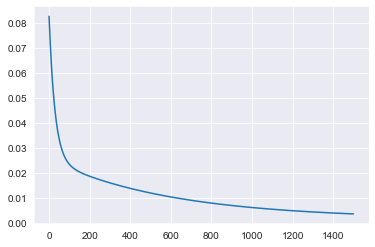

In [23]:
plt.plot(J_storage) #This plots the cost of each iteration against the number of iterations

Now, we will first plot the target value for a feature against the value of feature itself. Then, we will superimpose it with the the plot of the predicted value against the value of feature itself.

This process will be done for all features.

Note: We will not be plotting the normalized data but instead the actual values for these graphs

Text(0, 0.5, 'Food Inflation')

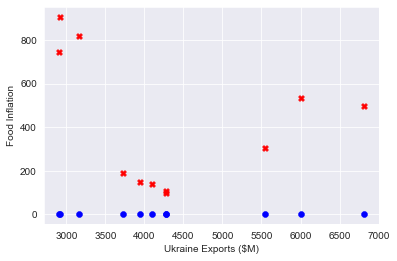

In [24]:
plt.scatter(df_feature_test[features_list[0]], df_target_test, c = 'r', linewidth = 0.5, marker = 'X') #Test data
plt.scatter(df_feature_test[features_list[0]], pred, c = 'b', linewidth = 0.5) #Regression model
plt.xlabel("Ukraine Exports ($M)")
plt.ylabel("Food Inflation")

Text(0, 0.5, 'Food Inflation')

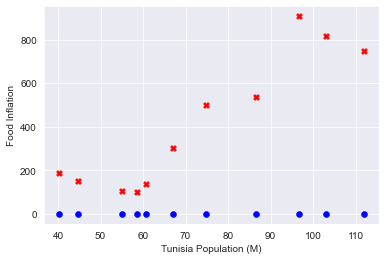

In [25]:
plt.scatter(df_feature_test[features_list[2]], df_target_test, c = 'r', linewidth = 0.5, marker = 'X')
plt.scatter(df_feature_test[features_list[2]], pred, c = 'b', linewidth = 0.5)
plt.xlabel("Tunisia Population (M)")
plt.ylabel("Food Inflation")

Text(0, 0.5, 'Food Inflation')

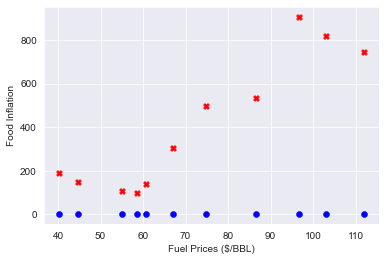

In [26]:
plt.scatter(df_feature_test[features_list[2]], df_target_test, c = 'r', linewidth = 0.5, marker = 'X')
plt.scatter(df_feature_test[features_list[2]], pred, c = 'b', linewidth = 0.5)
plt.xlabel("Fuel Prices ($/BBL)")
plt.ylabel("Food Inflation")

Now, calculating r^2 score

In [27]:
target = (normalize_minmax(df_target_test)).to_numpy() #We have to normalize target test as well because our response variable is normalized as well

r2 = r2_score(target, pred) # Calculate r2 score by calling the r2_score() function

print(r2)

0.9056121611801081


and then the mean squared error

In [28]:
mse = mean_squared_error(target, pred)

print(mse)

0.012367385794185668


Additionally, when it comes to the topic of estimating uncertainty in food safety, it is vital to be as accurate as possible, given the pooling of resources behind that decision.

Therefore, we have decided to use an adjusted R-squared value. While, this is not particularly required in our model as we have 3 predictor variables itself and adjusted R-squared is used to prevent overfitting. Nevertheless, the R^2 increases only when the new term improves the model more than would be expected and vice-versa. Moreover, it would help us in evaluating regression orders with greater number of variables created by other people.

The formula of adjusted R squared is as follows:

$$Adjusted  R^2 = 1 - \frac{(N-1)(1-r^2)}{N-p-1}$$ 

where:

- N = Total Sample Size
- R^2 = Sample R-squared
- p = Number of independent variables i.e. features

In [29]:
def r2_adjusted(r_squared, sample_size, features):
    result = 1 - ((1-r_squared)*(sample_size-1)/(sample_size-features-1))
    return result

adjusted_rscore = r2_adjusted(r2, df.shape[0], 3)
print(adjusted_rscore)

0.897031448560118


We notice our R^2 has decreased marginally (by 0.01)

### Discussion and Analysis

In this model, we have selected 3 independent variables or features. These are "Ukraine Exports, Tunisia Population and Fuel Prices. This was used for predicting our response variables which is "Change in Food Inflation since July-2019".

Initially, we created 3 various models with the aforementioned features and a mix of multiple different features from the following list:

- Tunisia's Agricultural GDP - Since Agricultural GDP reveals information about the revenue collected from Agricultural activies and thus its supply, we hypothesized that the Agricultural GDP might be a good indicator. This was later rejected due as our knowledge and research showed a non-conformation to the magnitude of the coefficient. 

- Tunisia's Unemployment rate - Since the individuals ability to purchase food is also dependent on their disposable income, it poses a well-known relationship called the Philips Curve. If inflation is high, unemployment is low and vice-versa. However, a deeper examination of empirical evidence of the US in the 1970's reveals that this was not true.

Below is an image illustrating the variables used in the three types of models created and their R^2 value:

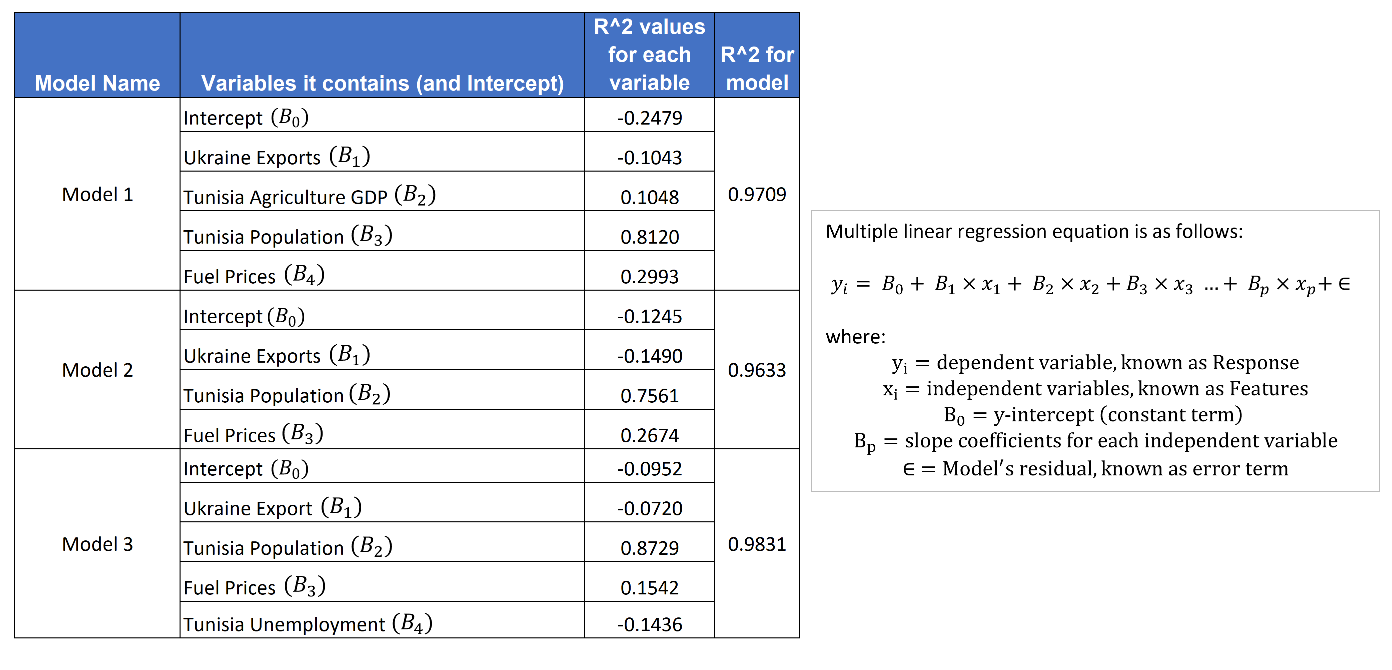

Now I shall be sharing the graphs of the response variable (Food Inflation) against all the features for our chosen models, along with its R^2 and equation. Utilizing these plots, empirical evidence and our knowledge and reasoning of those variables, we have chosen Model 2 for this project.

### Model 1 Graphs:

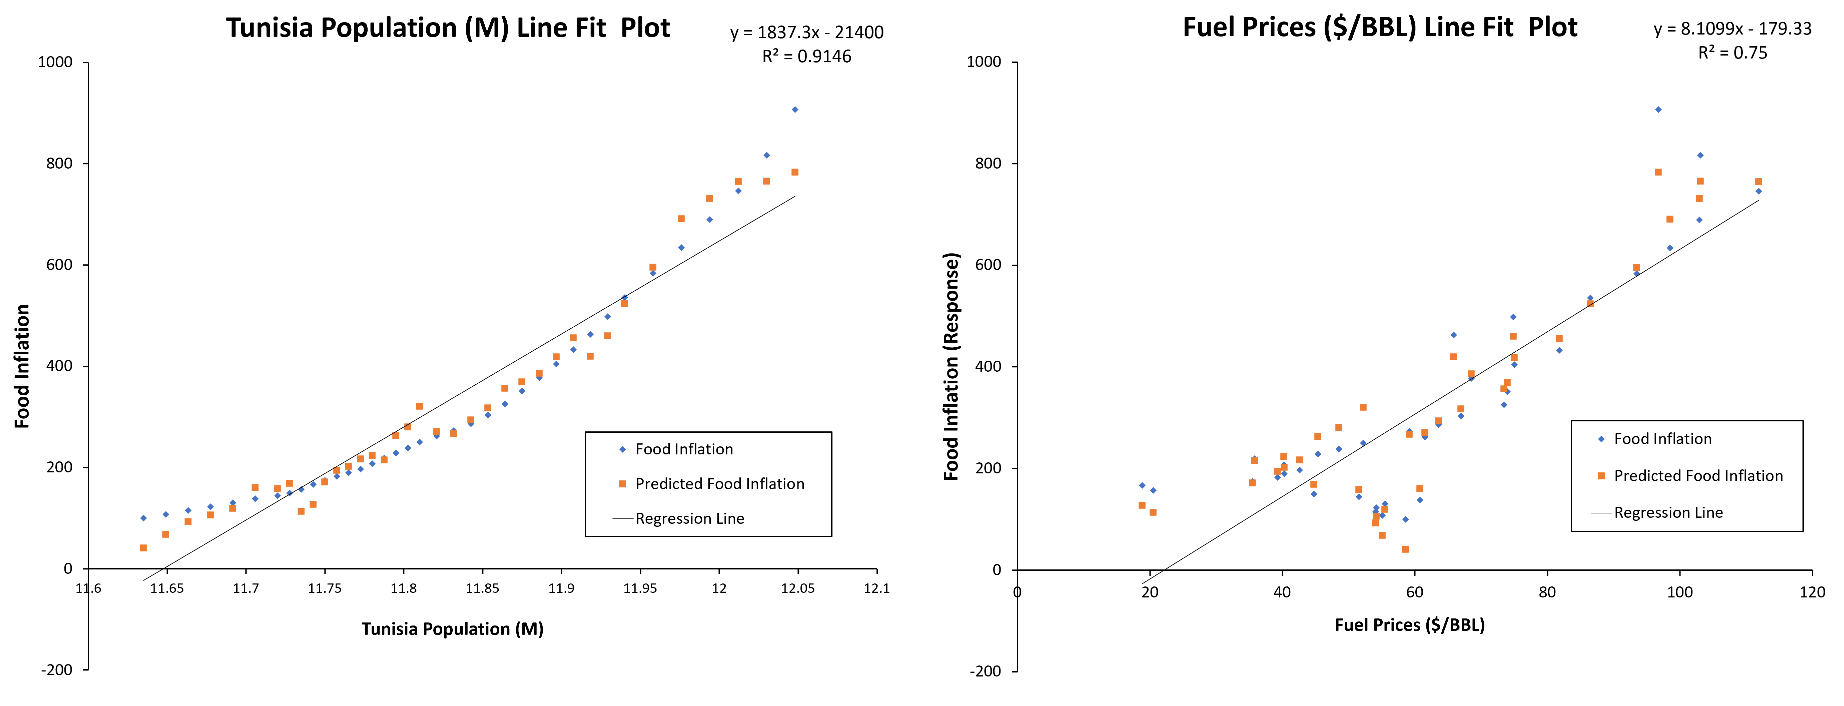

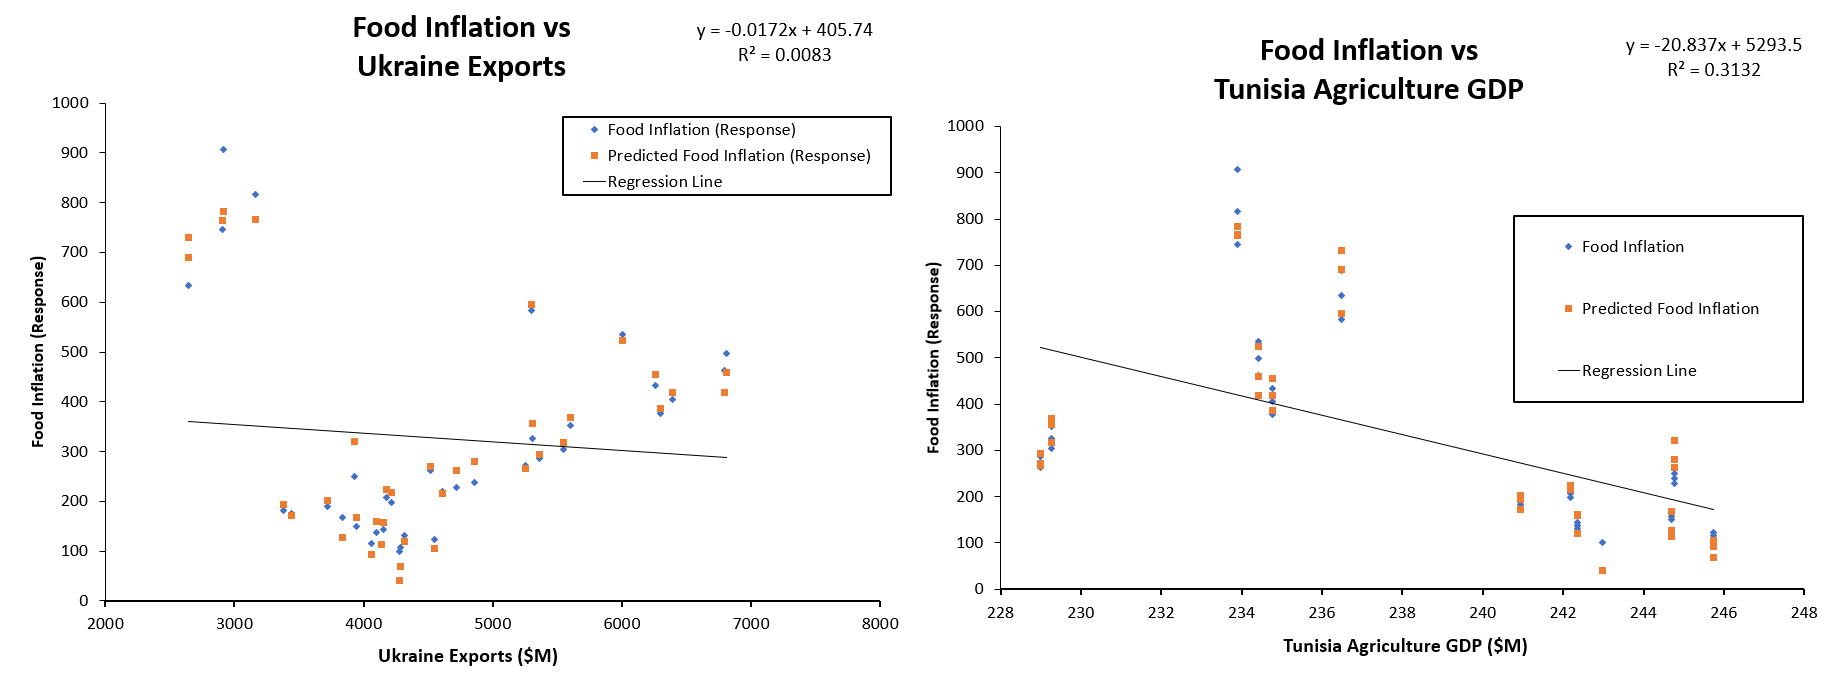

### Model 2 Graphs:

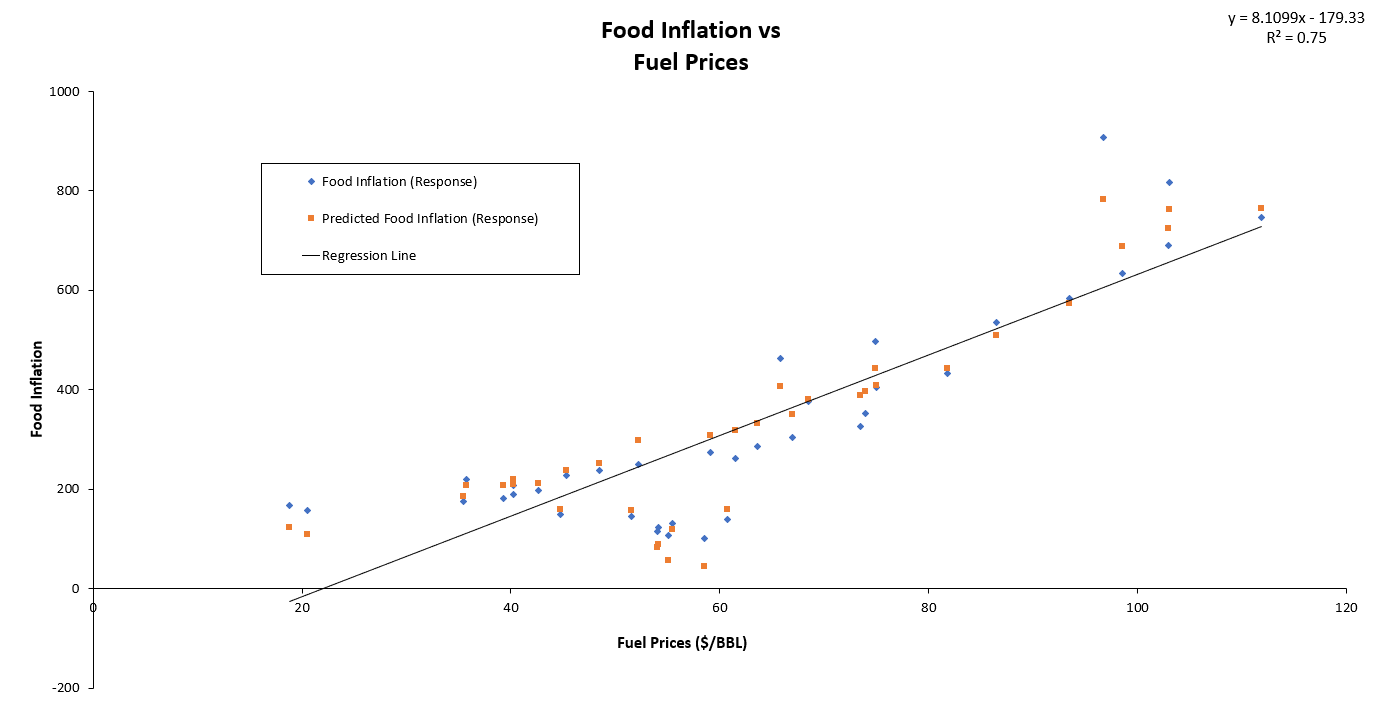

### Model 3 Graphs:

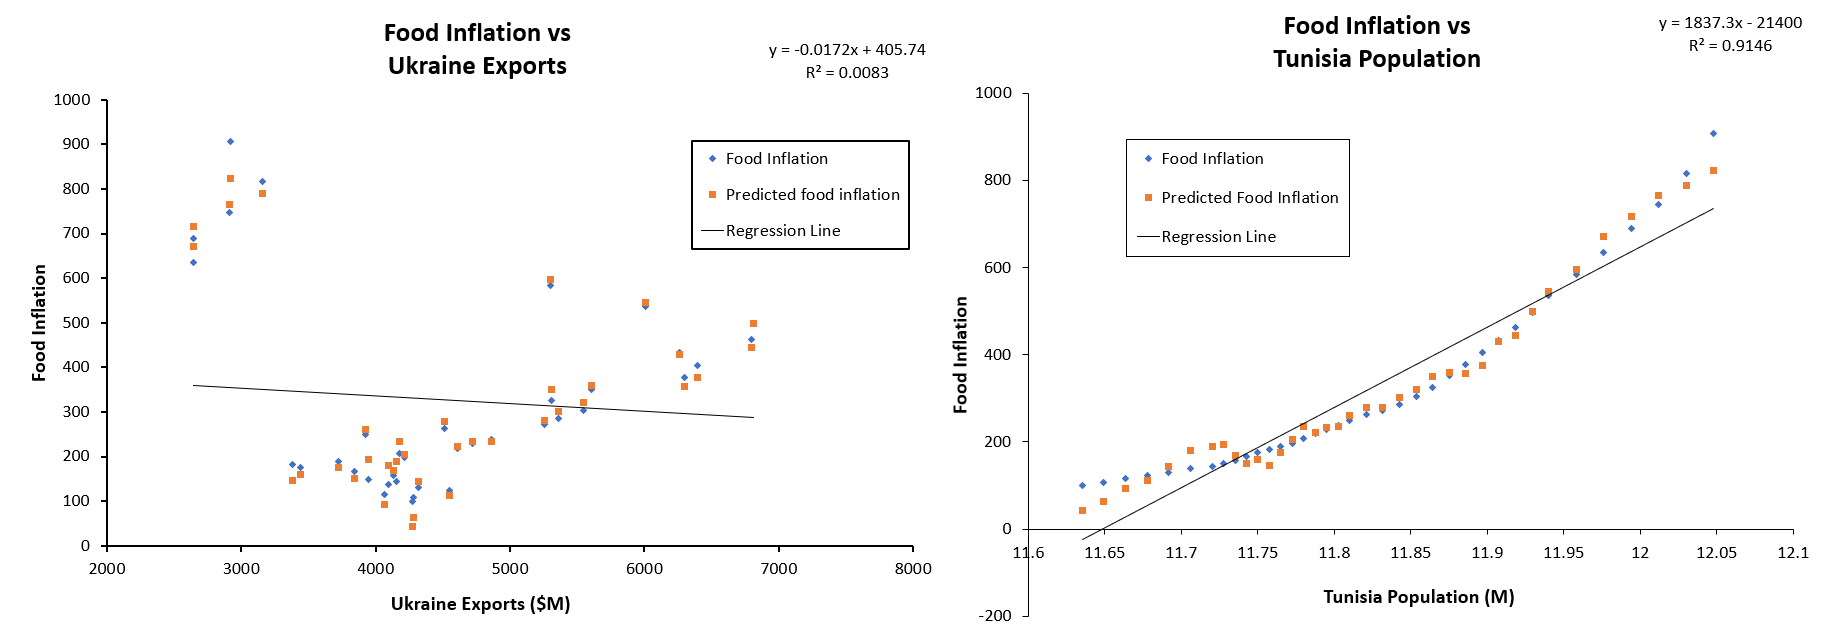

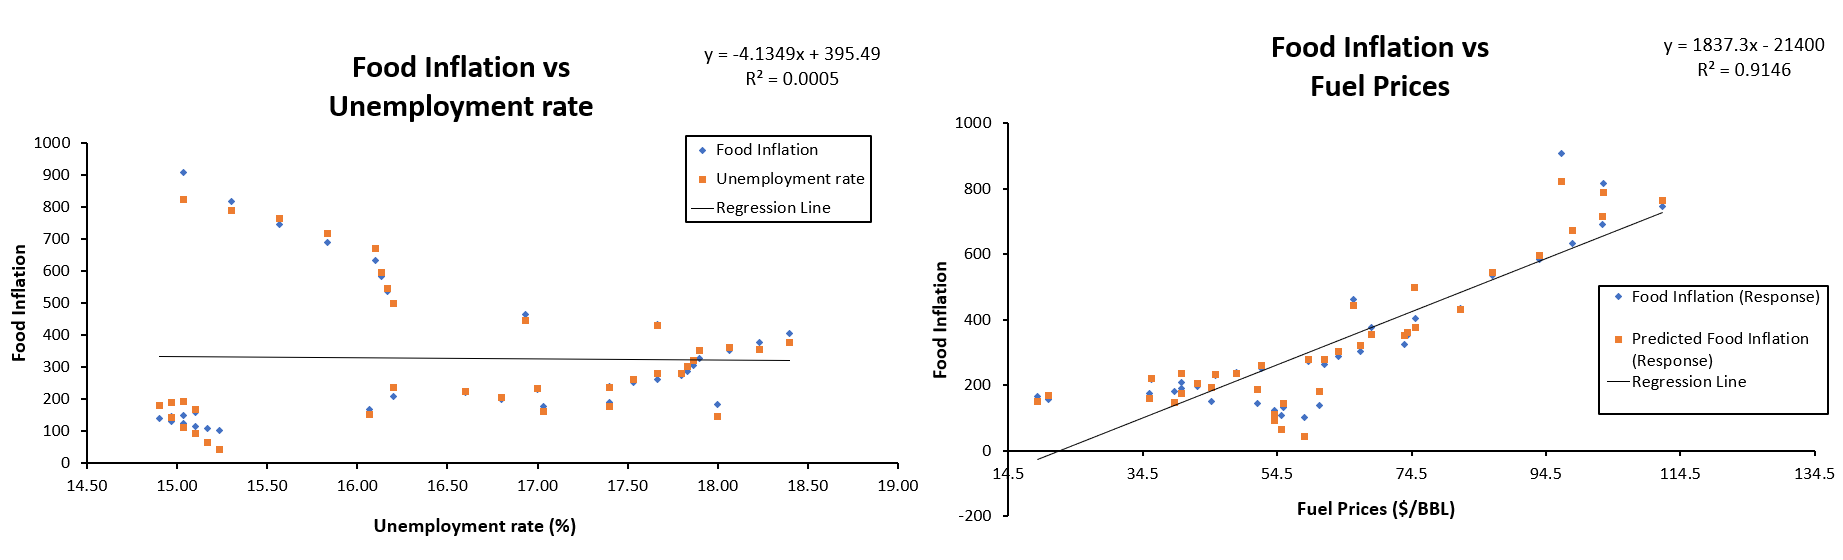

In the end, for Model 2, below are the list of variables and the results we obtained for those in Excel and Python

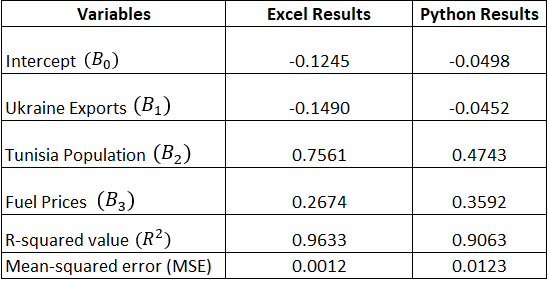

As we can see, the two results are astonishingly accurate, with discrepancies occuring in the first decimal place. One reason for this accuracy is because we closely paid attention to what data we are normalizing and carrying out operations on. That is, if all the data in Excel was normalized, we would normalize all the data in Python as well. This justifies the closely matching R-squared value and Mean-squared error.

### Possible Improvements (for the accuracy of our model)

It is quite hard to find possible improvements to our model, given its high degree of accuracy and narrow dataset with a small number of features. Nevertheless, we have tried some improvements and documented them below. 

The following are possible improvements we have tried to improve the accuracy of our model:

1) Treating outlier values <br>
2) Plot another form of regression like polynomial regression
3) Hyperparameter tuning <br>

#### Improvement 1 - Treating outlier values in our dataset

In [68]:
df_out = df.copy() #Creating copy 

In [31]:
df_outlier = df_out.drop(labels='Time', axis=1) #Dropping the "Tunisia Population" column as that will not be used in our numerical analysis
df_outlier

,Ukraine Exports ($M),Tunisia Population (M),Fuel Prices ($/BBL),Food Inflation (Response)
0,4276.40000,11.635000,58.580,100.000000
1,4282.30000,11.649167,55.100,107.400000
2,4062.20000,11.663333,54.070,115.240200
3,4549.10000,11.677500,54.180,122.846053
4,4320.00000,11.691667,55.487,130.585355
5,4097.20000,11.705833,60.756,138.159305
6,4155.01444,11.720000,51.560,144.238315
7,3945.27627,11.727500,44.760,149.575132
8,4135.70000,11.735000,20.480,157.203464
9,3838.96119,11.742500,18.840,166.950079


In [32]:
df_outlier_norm = normalize_minmax(df_outlier) # We are normalizing our dataset
df_outlier_norm

,Ukraine Exports ($M),Tunisia Population (M),Fuel Prices ($/BBL),Food Inflation (Response)
0,0.391951,0.000000,0.426990,0.000000
1,0.393367,0.034302,0.389599,0.009173
2,0.340513,0.068604,0.378532,0.018892
3,0.457436,0.102906,0.379714,0.028320
4,0.402421,0.137207,0.393757,0.037914
5,0.348918,0.171509,0.450371,0.047303
6,0.362802,0.205811,0.351563,0.054838
7,0.312436,0.223971,0.278500,0.061454
8,0.358163,0.242131,0.017621,0.070910
9,0.286906,0.260291,0.000000,0.082992


Best way to visualize outliers is via a box plot, which we have plotted below. 

This is because we know outliers are those data values which are:

- Greater than Q3 + (1.5 * IQR)
- Less than Q1 - (1.5 * IQR)

<AxesSubplot:>

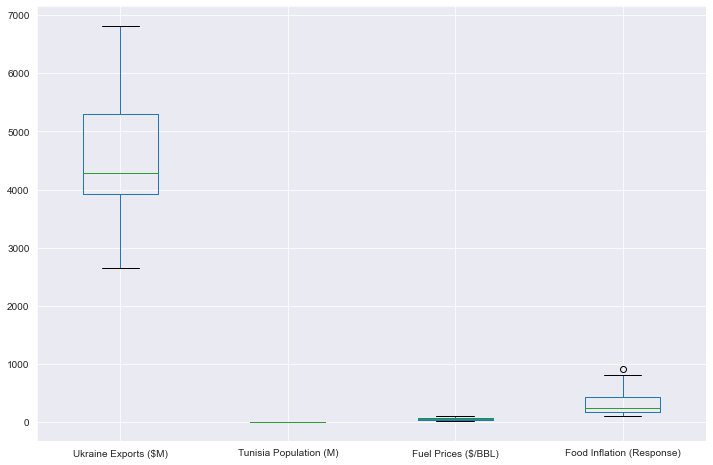

In [33]:
plt.figure(figsize = (12,8)) #Getting a bigger picture
df_outlier.boxplot() #Graphing non-normalized box plot

<AxesSubplot:>

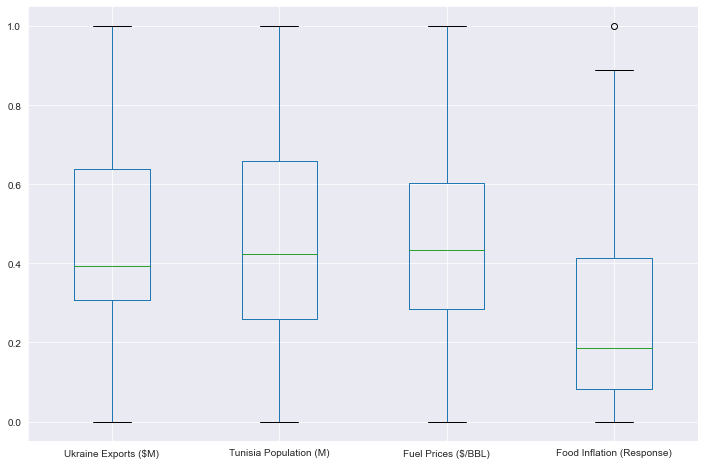

In [34]:
plt.figure(figsize = (12,8)) #Getting a bigger picture
df_outlier_norm.boxplot() #Graphing normalized box plot

Visually, we can notice that this data has no outliers but let us write certain functions to test definitely

In [35]:
def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75,25]) #This will return the 25th and 75th percentile
    IQR = Q3 - Q1 #IQR Formula
    UL = Q3 + 1.5*IQR #Upper Limit
    LL = Q1 - 1.5*IQR #Lower Limit
    return UL, LL

In [36]:
for column in df_outlier_norm.columns:
    if df_outlier_norm[column].dtype != 'object':
        UL, LL = outlier_limits(df_outlier_norm[column]) #Getting the upper and lower limit
        df_outlier_norm[column] = np.where((df_outlier_norm[column] > UL) | (df_outlier_norm[column] < LL), np.nan, df_outlier_norm[column]) 

In [37]:
df_outlier_norm.info() #Printing out info of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ukraine Exports ($M)       37 non-null     float64
 1   Tunisia Population (M)     37 non-null     float64
 2   Fuel Prices ($/BBL)        37 non-null     float64
 3   Food Inflation (Response)  36 non-null     float64
dtypes: float64(4)
memory usage: 1.3 KB


In [38]:
df_outlier_norm.isnull().sum() #There are no values missing i.e. this data has no outliers

Ukraine Exports ($M)         0
Tunisia Population (M)       0
Fuel Prices ($/BBL)          0
Food Inflation (Response)    1
dtype: int64

This result was sort of expected. Taking a broader perspective, we have selected the data in a 2-year outlier period itself out of other years (Russia vs Ukraine, Covid). Therefore, there should not be too high of a variation in our dataset, unless drastic, unprecedented events are unfolding in the real world, within this outlier time period.

#### Improvement 2 - Utilizing a polynomial regression

Recall that we had conducted this pairplot earlier

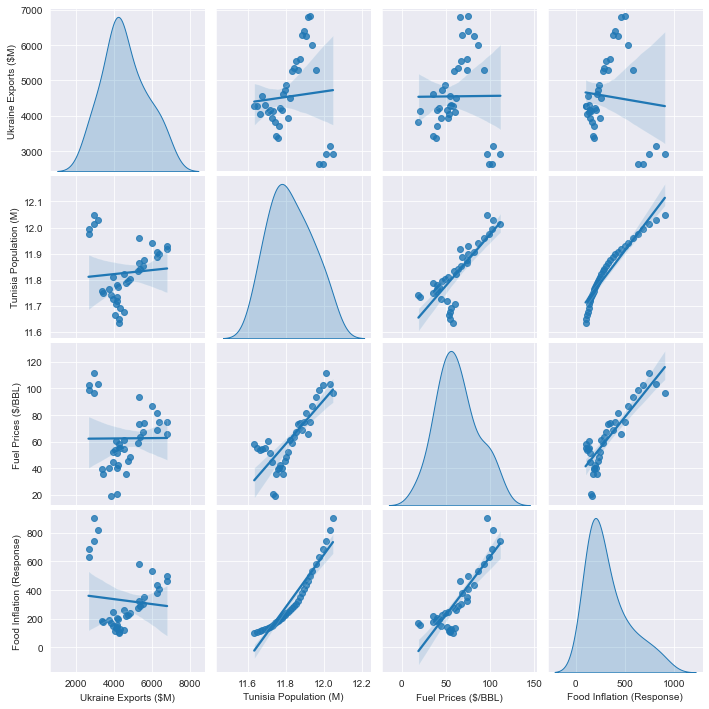

In [39]:
sns.pairplot(df, diag_kind = "kde", kind = 'reg')

Here, Food Inflation vs Tunisia Population {second grid in last row}, Food Inflation vs Fuel Prices {third grid in last row} and Fuel Prices vs Tunisia Population could seem to roughly satisfy a polynomial regression.

To test this out, we plotted a polynomial regression in the appendix. Below is the result of the polynomial regression compared to our orignal multiple linear regression model.

|Variables & Metrics|Multiple Linear Regression|Polynomial Regression|
| - | - | - |
|β0|-0.0498|-0.0491|
|β1|-0.0452|0.4750|
|β2|0.4743|-0.0447|
|β3|0.3592|0.3587|
|r2 value|0.9063|0.9063|
|Mean square error|0.0123|0.2826|

The coefficients obtained through the polynomial regression are of a completely different dimension than the ones produced by the multiple linear regression.

The coefficients for the multiple linear regression were conforming to our reasoning and background knowledge of how these variables operate. Therefore, we can say that the Polynomial regression is inaccurate, despite having a same r^2 value. Moreover, the mean square error, which assesses the average squared difference between the observed and predicted value is twice higher than the multiple linear regression model. Hence, applying a polynomial regression was not successful in this case. Although, there are other times when it makes sense to apply such a regression.

#### Improvement 3 - Hyperparameter tuning

Another improvement is conducting hyperparameter tuning of the gradient descent function by varying alpha and iterations.

If we want to increase the accuracy of the model, we have to increase alpha which is our learning rate. This is the number of steps that the gradient descent model will take.

This parameter should be carefully optimized such that: <br>
-It should not be too big as there is a possbility of the algorithm overshooting <br>
-Moreover, it should not be too small, such that it increases the computation time heavily <br>

Another way to optimize this model is to increase the number of iterations itself.

We can input random values for both alpha and iterations in a list. Then call a loop that will insert those values into our gradient_descent function. The value returned will be appended to a list (which was initially empty). This list will then return the lowest cost value.

However, this could be a bit computationally inefficient and it might not select appropriate combinations of two variables. 

Hence, this is normally carried out using libraries using scikit learn and on other models like decision trees etc.

In the appendix section, we have carried out one such exercise using XG Boost, along with GraphCV.

XG Boost is a state-of-the-art algorithm that is most used in the data science world. It utilizes an optimized gradient boosting algorithm through parallel processing, tree-pruning, handling of missing values and regularization. This was used in combination with GraphCV to iterate through the trees (although RandomSearchCV would be more efficient for larger datasets)

While we understand that using sci-kit learn library was not allowed, it did help us form an idea about the upper bound of our r^2 which helped us with our analysis. <br>

Moreover, it gave us a good ballpark range of the appropriate learning rate figure.

### Possible Improvements (for the data analysis process)

The list below is a summary of possible improvements to our data analysis process:

1) Hypothesis-driven analysis <br>
2) Going through a more defined process for feature selection <br>  


#### Improvement 1 - Hypothesis-driven analysis

Reference: https://discuss.analyticsvidhya.com/t/why-and-when-is-hypothesis-generation-important/2109/2

When first confronted with this problem, our team was just brainstorming variables together and searching and properly understanding the nature of each variable, i.e. doing our initial research.

However, had we followed a more hypothesis-driven analysis approach, we could have completed the feature and data search process in lesser time.

The idea behind hypothesis-drive analysis is first listing down a comprehensive set of analysis first and then immediately checking whether data can be collected on particular variables or not. Essentially, a restructuring in the priority of workflow execution. 

Although we selected only 5 features to analyze, we had considered a list of multiple features and spent considerable time building our domain knowledge to that list of features.

#### More defined process for feature selection

Our current method of feature selection is two-fold:
- Checking whether the sign of the coefficient of feature conforms with the knowledge we have regarding that variable
- Check the r^2 square value we are obtaining when response is plotted against that feature

We could have been more precise by following a stepwise regression model like:
- Forward Selection
- Backward Elimination
- Bidirectional Elimination

For example, take Forward Selection, here are the following steps:
Step 1 = Select an appropriate significance level
Step 2 = Fit all simple regression models and select the one with the lowest p_value
Step 3 = Keep this variable and fit all possible models with one extra predictor we have
Step 4 = Consider predictor with lowest p value. Then if P < significance level, go back to step 3. Else, keep the previous model

Such a model would provide better insights as we consider the statistical significance of the different feature variables (apart from r^2).

### Appendix

### Utilizing a polynomial regression instead of a multiple linear regression

In [40]:
df_pol = df.copy()

In [41]:
df_pol

,Time,Ukraine Exports ($M),Tunisia Population (M),Fuel Prices ($/BBL),Food Inflation (Response)
0,Jul-19,4276.40000,11.635000,58.580,100.000000
1,Aug-19,4282.30000,11.649167,55.100,107.400000
2,Sep-19,4062.20000,11.663333,54.070,115.240200
3,Oct-19,4549.10000,11.677500,54.180,122.846053
4,Nov-19,4320.00000,11.691667,55.487,130.585355
5,Dec-19,4097.20000,11.705833,60.756,138.159305
6,Jan-20,4155.01444,11.720000,51.560,144.238315
7,Feb-20,3945.27627,11.727500,44.760,149.575132
8,Mar-20,4135.70000,11.735000,20.480,157.203464
9,Apr-20,3838.96119,11.742500,18.840,166.950079


In [42]:
df_pol["Tunisia Population^2 (M^2)"] = df_pol["Tunisia Population (M)"].apply(lambda item: item**2) # squaring age values across all the rows and including them in a new column of the df

df_poly = df_pol.drop(labels='Tunisia Population (M)', axis=1) #Dropping the "Tunisia Population" column

df_poly_feature, df_poly_target = get_features_targets(df_poly, ["Tunisia Population^2 (M^2)", "Ukraine Exports ($M)", "Fuel Prices ($/BBL)"], ["Food Inflation (Response)"]) #selecting features and targets to slice the df

df_poly_features_train, df_poly_features_test, df_poly_target_train, df_poly_target_test = split_data(df_poly_feature, df_poly_target, random_state=100, test_size=0.3) # split data using random_state = 100 and 30% test size

df_poly_features_train_z = normalize_minmax(df_poly_features_train) # normalize features
df_poly_target_train_z = normalize_minmax(df_poly_target_train) #normalize targets

features_poly = prepare_feature(df_poly_features_train_z) 
target_poly = prepare_target(df_poly_target_train_z)

beta_2 = np.zeros((4,1))

beta_2, J_storage = gradient_descent(features_poly, target_poly, beta_2, 0.01, 1500)

In [43]:
print(beta_2) #Printing beta values

[[-0.04908817]
 [ 0.47509986]
 [-0.04469263]
 [ 0.35874489]]


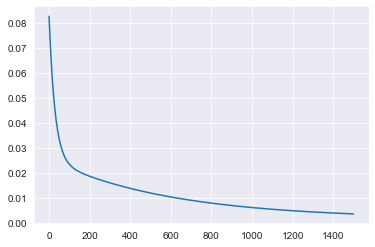

In [44]:
plt.plot(J_storage)

In [45]:
df_poly_features_test

,Tunisia Population^2 (M^2),Ukraine Exports ($M),Fuel Prices ($/BBL)
0,135.373225,4276.40000,58.580
1,135.703084,4282.30000,55.100
34,144.288144,2910.00000,111.910
35,144.720900,3159.30000,103.100
36,145.154304,2917.70000,96.750
5,137.026534,4097.20000,60.756
7,137.534256,3945.27627,44.760
12,138.415225,3720.20576,40.270
22,140.501511,5545.10000,66.930
29,142.305017,6808.50000,74.880


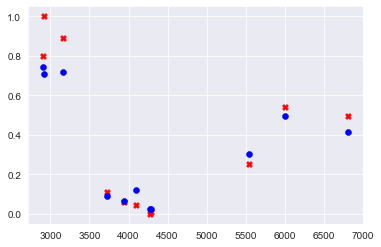

In [46]:
plt.scatter(df_poly_features_test["Ukraine Exports ($M)"], target,  c = 'r', linewidth = 0.5, marker = 'X')
plt.scatter(df_poly_features_test["Ukraine Exports ($M)"], pred, c = 'b', linewidth = 0.5)

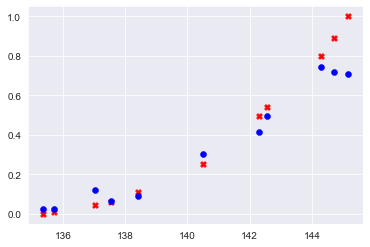

In [47]:
plt.scatter(df_poly_features_test["Tunisia Population^2 (M^2)"], target, c = 'r', linewidth = 0.5, marker = 'X')
plt.scatter(df_poly_features_test["Tunisia Population^2 (M^2)"], pred, c = 'b', linewidth = 0.5)

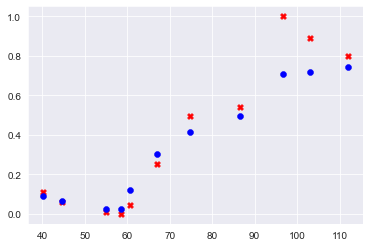

In [48]:
plt.scatter(df_poly_features_test["Fuel Prices ($/BBL)"], target, c = 'r', linewidth = 0.5, marker = 'X')
plt.scatter(df_poly_features_test["Fuel Prices ($/BBL)"], pred, c = 'b', linewidth = 0.5)

Calculating r^2 value:

In [49]:
target = prepare_target(normalize_minmax(df_poly_target_test)) #Normalizing our test set for target frame 
pred = predict(df_poly_features_test, beta_2)
r_poly = r2_score(target, pred)
print(r_poly)

0.9063094742263855


Calculating our MSE value:

In [50]:
mse = mean_squared_error(target, pred)

print(mse)

0.012276018732809391


### Hyperparameter tuning using Xgboost and GridSearch

In [51]:
df_hyper = df.copy()
# print(df_hyper)

In [52]:
X = df.iloc[:,:4].values
Y = df.iloc[:,4].values.reshape(-1,1) #Reshaped into 2D list as Sci-kit learn models take 2D lists

# print(np.shape(X))
# print(np.shape(X))

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_feature, df_target, test_size = 0.3, random_state = 2021)

In [54]:
import sys
!{sys.executable} -m pip install xgboost

In [55]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2021)

In [56]:
#Dictionary of hyperparameter values to search
parameters = {
    'n_estimators': [100,200,500,700], #Number of trees in XGBoost Model
    'max_depth': [4,6,8], #Depth of tree
    'gamma': [0.01,0.1],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}

In [57]:
from sklearn.model_selection import GridSearchCV #Make Grid Search Object

GS = GridSearchCV(estimator = xgb_model,
                  param_grid = parameters,
                  scoring = ["r2","neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4
                 )

In [58]:
GS.fit(X_train,Y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=4, n_estimators=100; neg_root_mean_squared_error: (test=-475.682) r2: (test=-1.254) total time=   0.7s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=4, n_estimators=100; neg_root_mean_squared_error: (test=-228.656) r2: (test=-4.573) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=4, n_estimators=100; neg_root_mean_squared_error: (test=-375.838) r2: (test=-2.075) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=4, n_estimators=100; neg_root_mean_squared_error: (test=-519.146) r2: (test=-3.637) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=4, n_estimators=100; neg_root_mean_squared_error: (test=-325.566) r2: (test=-3.887) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=4, n_estimators=200; neg_root_mean_squared_error: (test=-447.410) r2: (test=-0.994) tot

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [59]:
print(GS.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2021, ...)


In [60]:
print(GS.best_params_)  #The best model uses 500 trees, at a depth of 6, with learning rate 0.1 

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}


In [61]:
print(GS.best_score_) #Best R^2 value that our model has achieved within selected parameters

0.9438055042139173
